# FINANCIAL SERVICES USE IN TANZANIA

## Background

The  dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey.

### Each individual is classified into four mutually exclusive categories:

1. No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance

2. Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)

3. Mm_only: Individuals who use mobile money only

4. Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT.

In [57]:
#loading all neccessary python modules and files to use

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

%matplotlib inline

train = pd.read_csv("/home/recruit/Downloads/umuzi/projects/Data Visualisation 2/training.csv")


## 1. Examining the dataset

In [58]:
#Display the contents of the training csv file

print(train)

        ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8_1  Q8_2  ...  Q17  Q18  Q19  \
0     5086  98   2   3   1   1   2   2     0     0  ...   -1    4    4   
1     1258  40   1   1   3   5   1   1     1     0  ...    4    1    4   
2      331  18   2   4   6   3   2   1     0     0  ...   -1    1    1   
3     6729  50   1   1   3   1   1   1     0     0  ...   -1    1    4   
4     8671  34   1   1   1   1   2   1     0     1  ...   -1    1    4   
...    ...  ..  ..  ..  ..  ..  ..  ..   ...   ...  ...  ...  ...  ...   
7089  8378  57   2   3   3   1   2   2     0     1  ...   -1    1    4   
7090   881  32   1   1   6   3   1   1     0     1  ...   -1    1    1   
7091  6672  22   2   3   3   3   2   2     0     1  ...   -1    4    4   
7092  5416  28   2   1   3   1   2   2     0     1  ...   -1    1    4   
7093  3946  78   1   3   1   1   2   2     0     0  ...   -1    4    4   

      Latitude  Longitude  mobile_money  savings  borrowing  insurance  \
0    -4.460442  29.811396            

In [59]:
#Examine the dataset for misssing values and other unvalid information

train.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

There are no missing values in this data set, it looks clean

## 2. Basic descriptive statistics of dataset

In [60]:
#Getting basic descriptive statistics of the dataset.
train.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [61]:
#Renaming Columns for ease of use

train = train.rename(columns={'Q1':'age', 'Q2':'gender', 'Q3':'marital_status', 'Q6':'land_owned', 'Q8_1':'wage_income'})
train = train.rename(columns={'Q8_2':'trade_income', 'Q8_3':'service_income', 'Q8_4':'piece_income', 'Q8_5':'rent_income', 'Q8_6':'interest_income'})
train = train.rename(columns={'Q8_7':'pension_income', 'Q8_8':'welfare_income', 'Q8_9':'dependant_income', 'Q8_10':'expansepaid_income', 'Q8_11':'other_income'})
train = train.rename(columns={'Q4':'highest_level_of_education_completed', 'Q7': 'personally_own_a_mobile_phone'})

#Encoding the mobile_money_classification column
train['mobile_money_classification'] = train['mobile_money_classification'].astype(str)
new_mm_classification = {'mobile_money_classification': {'0':'no_financial_services', '1':'other_only', '2':'mm_only', '3':'mm_plus'}}
train.replace(new_mm_classification, inplace=True)

#Display changes

train.head()

,ID,age,gender,marital_status,highest_level_of_education_completed,Q5,land_owned,personally_own_a_mobile_phone,wage_income,trade_income,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,no_financial_services
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,mm_plus
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,mm_only
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,mm_plus
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,mm_plus


In [62]:
train.columns


Index(['ID', 'age', 'gender', 'marital_status',
       'highest_level_of_education_completed', 'Q5', 'land_owned',
       'personally_own_a_mobile_phone', 'wage_income', 'trade_income',
       'service_income', 'piece_income', 'rent_income', 'interest_income',
       'pension_income', 'welfare_income', 'dependant_income',
       'expansepaid_income', 'other_income', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Latitude', 'Longitude',
       'mobile_money', 'savings', 'borrowing', 'insurance',
       'mobile_money_classification'],
      dtype='object')

In [63]:
#Renaming indexes within columns

clean_up = {'gender':    
{   1:'Male', 
    2:'Female'
},

'marital_status': 
{   1:'Married',
    2:'Divorced',
    3:'Widowed',
    4:'Single/never married'
},

'highest_level_of_education_completed':
{   1:'No formal education',
    2:'Some primary',
    3:'Primary completed',
    4:'Post primary technical training',
    5:'Some secondary',
    6:'University or other higher education',
    7: 'Don’t know'
},

'Q5':
{   1:'Personally owns land',
    2:'Owns land with someone els',
    3:'Household member owns land',
    4:'land is rented',
    5:'Dont own land',
    6:'Dont know'
   
},            
            
'land_owned':
{   1:'Yes',
    2:'No'
   
},

'personally_own_a_mobile_phone':
{   1:'Yes',
    2:'No'
       
},

'mobile_money_classification' :
{   0:'No mobile money or other financial service',
    1:'One other finacial service',
    2:'Mobile money only',
    3:'Mobile money and other financial service'
},
            
 'Q16':
{   -1:'not apllicable',
    1:'Yesterday/today',
    2:'In the past 7 days',
    3:'In the past 30 days',
    4:'In the past 90 days',
    5:' More than 90 days ago but less than 6 months ago',
    6:' 6 months or longer ago'
},

'wage_income': 
{   1:'Yes',
    0:'No',
},

'trade_income': 
{   1:'Yes',
    0:'No'
},

'service_income': 
{   1:'Yes',
    0:'No'
},

'piece_income': 
{   1:'Yes',
    0:'No'
},

'rent_income': 
{   1:'Yes',
    0:'No'
},

'interest_income': 
{   1:'Yes',
    0:'No'
},

'pension_income': 
{   1:'Yes',
    0:'No'
},

'welfare_income': 
{   1:'Yes',
    0:'No'
},

'dependant_income': 
{   1:'Yes',
    0:'No'
},

'expansepaid_income': 
{   1:'Yes',
    0:'No'
},

'other_income': 
{   1:'Yes',
    0:'No'
}
           }

train.replace(clean_up, inplace=True)
train.head()

,ID,age,gender,marital_status,highest_level_of_education_completed,Q5,land_owned,personally_own_a_mobile_phone,wage_income,trade_income,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,Female,Widowed,No formal education,Personally owns land,No,No,No,No,...,-1,4,4,-4.460442,29.811396,0,0,0,0,no_financial_services
1,1258,40,Male,Married,Primary completed,Dont own land,Yes,Yes,Yes,No,...,4,1,4,-6.176438,39.244871,1,1,1,0,mm_plus
2,331,18,Female,Single/never married,University or other higher education,Household member owns land,No,Yes,No,No,...,-1,1,1,-6.825702,37.652798,1,0,0,0,mm_only
3,6729,50,Male,Married,Primary completed,Personally owns land,Yes,Yes,No,No,...,-1,1,4,-3.372049,35.808307,1,0,1,0,mm_plus
4,8671,34,Male,Married,No formal education,Personally owns land,No,Yes,No,Yes,...,-1,1,4,-7.179645,31.039095,1,1,0,1,mm_plus


## 3. Visual repressentation of the relationships occuring in the data

### 3.1 Financial Services Accessed by Age

Text(0.5, 1.0, 'Financial Services Accessed by Age')

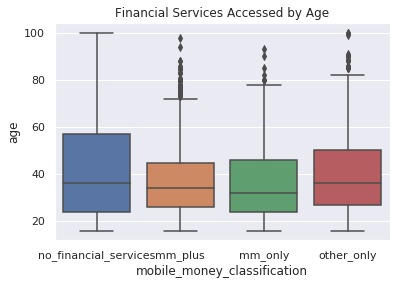

In [64]:
#Visual representation of the relationship between accessed financial services (non-mobile, mobile, both) and age.

sns.boxplot(x='mobile_money_classification', y='age', data=train).set_title('Financial Services Accessed by Age')

The box Plot above shows that on average people using mobile money and other financial services aare between the ages of 24 years and 44 years. 

### 3.2 Accessed Financial Services by Gender

In [65]:
gender_frequency = pd.crosstab(index=train['mobile_money_classification'], columns=train['gender']).apply(lambda x: 100 * x / float(x.sum()))

#gender_frequency = gender_frequency.rename(columns={'1':'Male', '2':'Female'}

gender_frequency



gender,Female,Male
mobile_money_classification,,
mm_only,11.329305,11.338885
mm_plus,38.293051,51.409353
no_financial_services,23.111782,14.990391
other_only,27.265861,22.261371


The above table shows the usage of mobile money of different gender in percentages.


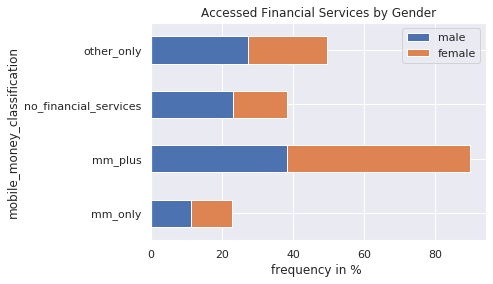

In [66]:
#Visual representation of the relationship between accessed financial services (non-mobile, mobile, both) and Gender

%matplotlib inline

gender_frequency.plot(kind='barh', stacked=True).set_title('Accessed Financial Services by Gender')
plt.xlabel('frequency in % ')
plt.legend(('male','female'))

The graph above indicates that in percentage, females use mobile money and other financial services more than males

### 3.3 Financial Services Accessed by Marital Status

In [67]:
marital_status = pd.crosstab(index=train['mobile_money_classification'], columns=train['marital_status']).apply(lambda x: 100 * x / float(x.sum()))

marital_status

marital_status,Divorced,Married,Single/never married,Widowed
mobile_money_classification,,,,
mm_only,13.682678,10.180299,15.749365,8.997050
mm_plus,42.066958,45.888303,46.824725,29.056047
no_financial_services,18.486172,17.194371,20.491109,34.660767
other_only,25.764192,26.737027,16.934801,27.286136


The table above shows the count(in percentage), of people belonging to various marital status and their use of mobile money and other financial services 

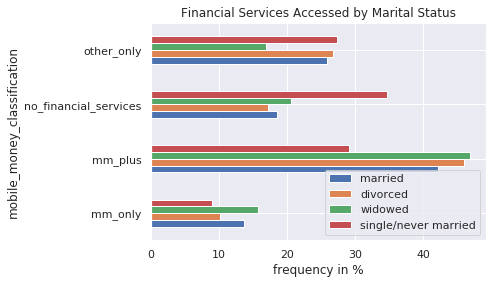

In [68]:
#Visual representation of the relationship between accessed financial services (non-mobile, mobile, both) and Marital Status

marital_status.plot(kind='barh', stacked=False).set_title('Financial Services Accessed by Marital Status')
plt.xlabel('frequency in %')
plt.legend(('married','divorced', 'widowed' , 'single/never married'))

The horizontal bar graph above illustrates  that a large group of widows access mobile money more than married, divorced or single people.

### 3.4 Financial Services Accessed as per Land Owned

In [69]:
land_ownwership = pd.crosstab(index=train['mobile_money_classification'], columns=train['land_owned']).apply(lambda x: 100 * x / float(x.sum()))

land_ownwership

land_owned,No,Yes
mobile_money_classification,,
mm_only,11.722287,9.283820
mm_plus,41.573034,57.206012
no_financial_services,20.996143,11.847922
other_only,25.708536,21.662246


This table above shows the count(in percentage) of people who have access to mobile money and eith own land or dont own land

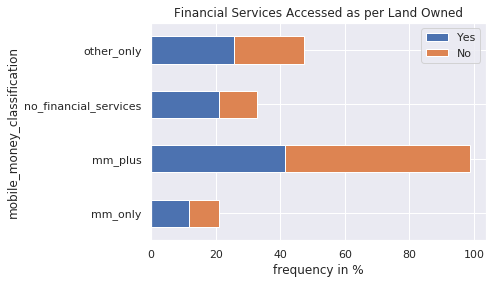

In [70]:
land_ownwership.plot(kind='barh', stacked=True).set_title('Financial Services Accessed as per Land Owned')
plt.xlabel('frequency in %')
plt.legend(('Yes','No'))


The horizontally stacked graph above shows that more people who own land are more active in mobile money and other financial services than those who dont own land

### 3.5 Financial Services Accessed by various Types of Income


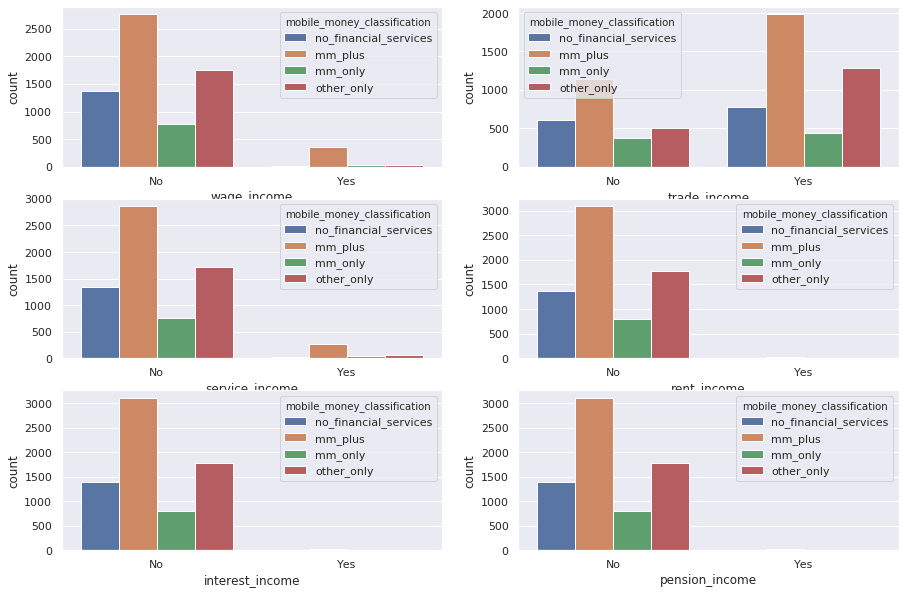

In [79]:
by = 'mobile_money_classification'

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.countplot(x='wage_income', hue=by, ax=axes[0, 0], data=train)
sns.countplot(x='trade_income', hue=by, ax=axes[0, 1], data=train)
sns.countplot(x='service_income', hue=by, ax=axes[1, 0], data=train)
sns.countplot(x='rent_income', hue=by, ax=axes[1, 1], data=train)
sns.countplot(x='interest_income', hue=by, ax=axes[2, 0], data=train)
sns.countplot(x='pension_income', hue=by, ax=axes[2, 1], data=train)


According to the graphs above, people who receive their income through trading access mobile money and other financial services more than other people who get their income through other means.


#### 3.5.2. Income recieved from trading

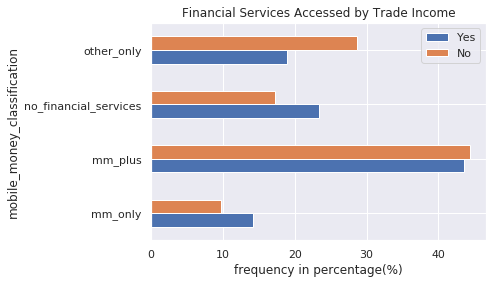

In [80]:
trade_income = pd.crosstab(index=train['mobile_money_classification'], columns=train['trade_income']).apply(lambda x: 100 * x / float(x.sum()))

trade_income.plot(kind='barh', stacked=False).set_title('Financial Services Accessed by Trade Income')
plt.xlabel('frequency in percentage(%)')
plt.legend(('Yes','No'))

The horizontal bar graph above shows that people having access to trading income access mobile money and other financial services by atleast 40%

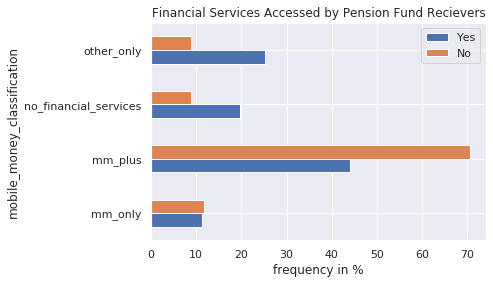

In [81]:
pension_fund = pd.crosstab(index=train['mobile_money_classification'], columns=train['pension_income']).apply(lambda x: 100 * x / float(x.sum()))

# plot graph
pension_fund.plot(kind='barh', stacked=False).set_title('Financial Services Accessed by Pension Fund Recievers')
plt.xlabel('frequency in %')
plt.legend(('Yes','No'))

Pension fund recievers also access more mobile money and other financial services by a little over 70%. This is according to the above bar graph

## 5. Geographic Distribution Representation

In [87]:
from geopy.geocoders import Nominatim
import folium

lat = -6.3728253 ; lon = 34.8924826
Country_map = folium.Map(location=[lat, lon], zoom_start=6)


for lat, long, label in zip(train['Latitude'],train['Longitude'],'Q8_5'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'green',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map



for lat, long, label in zip(train['Latitude'],train['Longitude'],'Q8_7'):
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        color = 'yellow',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(train['Latitude'],train['Longitude'],'Q8_2'):
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        color = 'purple',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map




Key for the above map:

>Green represents Rental income receivers...
>Yellow represents Trading income recivers...
>Purple represents Pansion fund recivers...

## 6. Conclusion

There is a higher usage of mobile money and other financial services among females, and widows and people between the ages of 25 years old-44 years old including people who earn money via pension fund and trading